# MARCO SAVINO

# LUCA LAZZATI

# MODELING AND FORECASTING LATIN AMERICA & CARIBBEAN GDP per capita using ARIMA models

Seguendo la metodologia Box-Jenkins, costruiremo un modello di media mobile integrata autoregressiva per prevedere il PIL pro capite LATIN AMERICA & CARIBBEAN, secondo le regole di riconoscimento ARIMA (test stazionario, residui di rumore bianco gaussiano, ...), sotto la Criterio AIC. Utilizzando questo modello ARIMA ottimizzato, genereremo una proiezione per il PIL pro capite fino al 2025. 

Infine, dopo aver costruito un secondo modello ARIMA ottimizzato per proiettare il PIL mondiale in PPP al 2025, analizzeremo come la proiezione LATIN AMERICA & CARIBBEAN si combina con la media mondiale. 

Trarremo le nostre conclusioni dalle caratteristiche di base di entrambe le serie temporali previste e analizzeremo quale modello di trasformazione strutturale necessario affinché SSA converga con la media mondiale.


Metodologia Box-Jenkins

La metodologia BJ prevede quattro passaggi:

1) Identificazione delle serie storiche

2) Stima del modello: dopo aver identificato i parametri appropriati del modello ARIMA.

3) Diagnostica del modello: dobbiamo verificare che i residui del modello seguano una distribuzione del rumore bianco.

4) Previsioni: possiamo proiettare inferenze predittive statistiche.

In [0]:
pip install chart_studio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import numpy as np
import statsmodels.api as sm
from chart_studio.plotly import plot_mpl
from plotly.offline import init_notebook_mode, iplot_mpl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/WDIData.csv")

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.702495,74.944860,76.258066,77.120464,78.094440,79.062000,79.851681,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.262566,76.653498,79.021102,80.209279,84.116961,82.863365,85.083407,84.674458,86.007620,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.558249,54.944395,56.932309,58.02529,59.727156,60.960636,59.661362,62.945506,60.944261,63.226753,64.094673,66.413865,71.817854,69.066483,72.202886,71.818284,73.466653,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.243357,93.179654,94.781397,94.629370,95.378013,94.771734,95.704618,95.939242,95.962166,96.352930,95.997833,96.649916,96.834184,97.003974,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [5]:
df['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

# PRE-PROCESSING

ELIMINAZIONE MISSING DATA E DATA PREPARATION


Sfortunatamente possiamo solo tenere conto delle osservazioni di 28 anni, dal 1990 al 2018 che è inferiore ai 50 raccomandati per costruire un modello ARIMA basato sul Box-Jenkins metodologia di previsione di serie storiche.

Dal database della Banca mondiale, abbiamo raccolto dati PPP sul PIL per 27 anni dal 1990 al 2018. Il campione è composto da 36 economie Latin America & Caribbean.


In [0]:
city= 'Antigua and Barbuda|Argentina|Aruba|Bahamas, The|Barbados|Belize|Bolivia|Brazil|Cayman Islands'
city1 = '|Cayman Islands|Chile|Colombia|Costa Rica|Curacao|Dominica|Dominican Republic|Ecuador|El Salvador|Grenada|Guatemala|Guyana|Haiti|Honduras|Jamaica|Mexico|Nicaragua|Panama|Paraguay|Peru|Puerto Rico'
city2 = '|St. Vincent and the Grenadines|St. Kitts and Nevis|St. Lucia|Suriname|Trinidad and Tobago|Turks and Caicos Islands|Uruguay|Venezuela'
cityall = city + city1 + city2
df=df[(df['Country Name'].str.contains(cityall)==True)]
df['Indicator Name']=df['Indicator Name'].str.replace('(',':').str.replace(')',':')

In [0]:
#df['Indicator Name'].values[:600]

In [0]:
df=df[df['Indicator Name'].str.contains("GDP per capita :current US")==True]
df.index=df['Country Name']
df=df.fillna(method='bfill',axis=1)
df=df.fillna(method='ffill',axis=1)
df=df.iloc[:,4:-2]
ts=df.mean()
ts=pd.DataFrame(ts)
ts.columns=['GDP per capita']

In [9]:
df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1246.750329,1416.586200,1760.717634,2124.481155,2392.261075,2660.601157,2947.935536,3372.492900,3899.328728,4703.179401,5463.241276,6453.477000,7076.422212,7348.212943,7601.848491,7744.274917,8136.168840,8770.751631,8406.592992,9030.975299,9492.038256,9940.191639,10260.585022,10920.842688,10370.671130,10404.436213,10789.950960,11446.638470,12547.613040,13989.715666,15607.089869,16024.345551,14113.077260,13049.257055,12746.205024,13272.441329,12909.744178,13501.580922,14286.093160,15197.617455,15383.415188,16726.980808
Argentina,1155.890170,1155.890170,1155.890170,850.304737,1173.238213,1279.113432,1272.802978,1062.543552,1141.080481,1329.058659,1322.590804,1372.374343,1408.865208,2097.022579,2844.863648,2027.337124,1948.224686,2129.708281,2146.364483,2520.921634,2758.835212,2776.321990,2927.897560,3553.377752,2659.708600,2926.126970,3613.621709,3562.875602,3985.191210,2383.867693,4333.482973,5735.360327,6823.537616,6969.118088,7483.139682,7408.708238,7721.354543,8213.127200,8289.505729,7774.736203,7708.100996,7208.371567,2593.404150,3349.806124,4277.721351,5109.851325,5919.012037,7245.448317,9020.873098,8225.137176,10385.964432,12848.864197,13082.664326,13080.254732,12334.798245,13789.060425,12790.242473,14591.863381,11683.949622
Aruba,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,6472.502029,7885.796545,9764.789979,11392.455811,12307.311738,13496.003385,14046.503997,14936.827039,16241.046325,16439.356361,16586.068436,17927.749635,19078.343191,19356.203389,20620.700626,20669.031969,20436.887129,20833.761612,22569.974985,23300.039558,24045.272483,25835.132668,27084.703690,24630.453714,23512.602596,24985.993281,24713.698045,25025.099563,25533.569780,25796.380251,25239.600411,25630.266492,25630.266492
"Bahamas, The",1550.239392,1651.288985,1752.854481,1867.025012,1994.380832,2144.754403,2322.689948,2556.651018,2804.333876,3215.095179,3178.844552,3297.505880,3322.163876,3696.072544,3416.162489,3156.234118,3328.512407,3617.434716,4131.468448,5533.439976,6340.726812,6624.838617,7168.095774,7698.459242,8877.319798,9893.084177,10344.452487,11156.282089,11387.709082,12163.681361,12356.423896,11919.787899,11686.695811,11406.689810,11814.563198,12238.386203,12708.730958,22036.484107,23514.420314,26130.101815,27097.610812,27486.236774,28866.801014,28327.270869,28395.924665,30278.366922,30713.705280,31472.098972,30627.238631,28552.190478,28443.407655,28006.379718,29485.620929,28768.029894,29445.030529,31405.963560,31588.834999,31827.242699,32217.871590
Barbados,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1274.543163,1633.849562,1760.667205,1988.847250,2209.740519,2667.037140,3408.911477,3738.480896,3894.057172,4123.092895,4481.192104,4676.170335,5117.000958,5614.760004,5949.925859,6554.824664,7754.078594,7663.503291,7421.087468,7754.417002,8121.374224,8505.084959,9031.574423,9505.667594,10672.391752,11137.254949,11496.602398,11437.247706,11592.209930,11937.673378,12766.270470,14104.146235,15199.280661,16770.747937,17092.314589,15886.139294,16056.116839,16459.058013,16249.89777

# Time Series Identification & Data Exploration

In [10]:
X=pd.to_datetime(ts.index)
y=ts['GDP per capita']
layout = go.Layout(title= 'Latin America & Caribbean GDP per capita 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
fig =go.Figure(data=[go.Scatter(x=X,y=y)], layout=layout)
fig.show(renderer="colab")

In [11]:
ts_2=ts
ts_2['log_GDP_pc']=np.log(ts['GDP per capita'])
X=ts['log_GDP_pc'].index
y_1=ts['log_GDP_pc']
layout = go.Layout(title= 'Latin America & Caribbean per capita 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_1, mode = 'lines',name="SSA GDPpc $ growth 1960-2018", marker = dict(size=12, color='red'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Dalla cifra delle serie temporali sopra, l'ispezione visiva del diagramma temporale indica chiaramente che il PIL pro capite Latin America & Caribbean segue un modello di crescita additiva positiva. 

La media e la varianza non sono chiaramente costanti. 

Pertanto, lo consideriamo come una serie temporale non stazionaria.

# Time Series growth dynamic examination

In [12]:
ts_1=ts
ts_1['mean']=ts['GDP per capita'].pct_change().fillna(0).mean()
X=ts['GDP per capita'].index
y_2=ts['GDP per capita'].pct_change().fillna(0)
y1=ts_1['mean']
layout = go.Layout(title= 'Latin America & Caribbean GDP per capita growth dynamic 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_2, mode = 'lines',name="SSA GDPpc $ growth 1960-2018", marker = dict(size=12, color='red'))
trace1 = go.Scatter(x=X,y=y1, mode = 'lines', name="TS Mean ", marker = dict(size=12, color='darkcyan'))
data = [trace0,trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Analizzare la dinamica di crescita delle serie storiche; Possiamo identificare alcuni schemi ciclici. Pertanto, dal 1990 al 2002 la crescita è stata tra alti e bassi della serie. 

Dal 2002 al 2006 vediamo che la crescita si accelera progressivamente fino a raggiungere un picco nel 2006 (circa 20%) (periodo pre-depressione). 

Le dinamiche post-depressione dal 2007 sono caratterizzate da una descrescita  dei tassi di crescita con un forte calo nel 2009(addirittura -7%!!). 

Dopo il forte calo del 2009, si avvia (fino al recente periodo) una tendenza rialzista verso la media del 3% della serie.

In [13]:
returns1 = ts['GDP per capita'].pct_change().fillna(0)
ret_index_1 = (1+returns1).cumprod()
X_1=ret_index_1.index
y_1=ret_index_1.values
layout = go.Layout(title= 'Latin America & Caribbean GDP 1960-2018 accumulative growth (Index 1=1960)',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
data = [go.Bar(x=X_1,y=y_1,marker =dict(color='lightsalmon'))]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Questa serie indicizzata (1960 = 1) ci offre una buona prospettiva sulla dinamica di crescita cumulativa della serie. Siamo in grado di identificare una tendenza non molto regolare per via della crisi finanziaria del 2009, infatti abbiamo un ribasso dal 2008 al 2009 molto significativo.

Dal 2009 al 2018 in crescita.

# ACF

Il primo test per indicare la di stazionarietà deve essere la funzione di autocorrelazione ACF.

L'ACF a ritardo k indicato come:

pk = covariencek / varianza
 
Dove abbiamo ogni covarianza di osservazione a ritardo k. 

Poiché sia la varianza che la covarianza sono misurate nelle stesse unità di misura, la funzione di autocorrelazione è senza unità e si trova tra -1 e 1 di qualsiasi altra correlazione correlata.

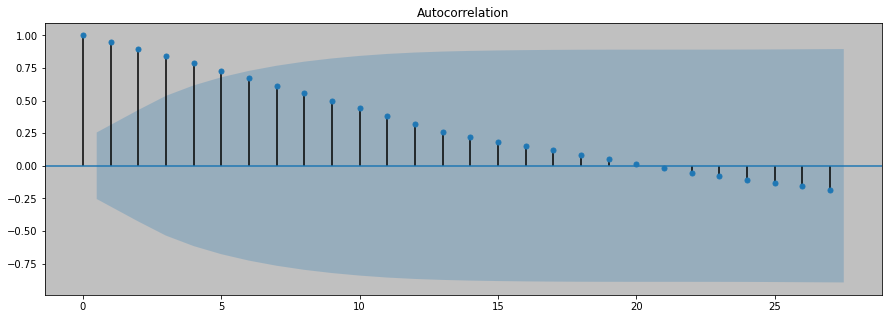

In [14]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
sm.graphics.tsa.plot_acf(y,ax=ax,lags=27)
plt.show()

Un esame visivo del correlogramma al ritardo 27 conferma che i dati sono chiaramente non stazionari e seguono uno schema di crescita autoregressivo cumulativo e inizia ad accumulare autocorrelazione negativa. È il risultato atteso per una serie temporale additiva in crescita, senza stagionalità. Il margine blu mostra l'intervallo di confidenza al 95%.



Concetto di stazionarietà:

Un processo stocastico è chiamato fortemente stazionario se la distribuzione delle serie storiche originali è esattamente la stessa delle sue versioni ritardate. Pertanto, la distribuzione delle serie temporali è invariata per qualsiasi spostamento del tempo.

Questo presupposto, tuttavia, non si applica alle serie in tempo reale e un presupposto più lieve entra in scena, la stazionarietà della covarianza. Questo significa solo che la media e la varianza delle serie non dovrebbero essere una funzione del tempo (devono essere finite e indipendenti dal tempo) e che l'autocovarianza tra i punti temporali ed è anche finita e dipende solo dalla distanza tra i due punti .

Perché è importante rendere stazionarie le nostre serie storiche? Se le nostre serie aumentano / diminuiscono costantemente nel tempo, significa che o la media non è costante o che le varianze-autocovarianze dipendono dal tempo, il che rende più difficile sviluppare la teoria matematica e i modelli per le serie temporali. In sintesi, possiamo studiare solo i modelli di serie per un determinato periodo e non possiamo costruire con esso modelli ARIMA predittivi generalizzati.

# Rolling Mean, Std and Dickey-Fuller Test

Sebbene visualizzando le serie temporali sia abbastanza facile identificare una media o variazione variabile nei dati, per una valutazione stazionaria più accurata dobbiamo effettuare il test Dickey-Fuller.

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.rc('xtick', labelsize=8); plt.rc('ytick', labelsize=16) 
    plt.xticks([])
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

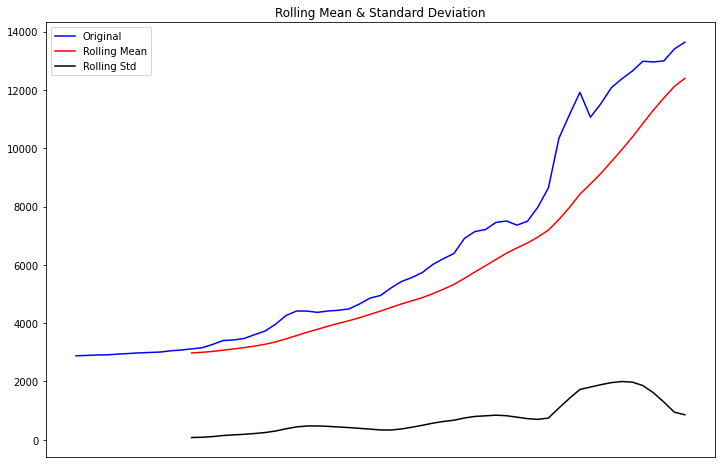

Results of Dickey-Fuller Test:
Test Statistic                  1.821711
p-value                         0.998391
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


In [16]:
test_stationarity(y) 

A giudicare dalla trama media mobile, è evidente che c'è una tendenza nei dati e che i dati non sono stazionari.

Anche il risultato del test Dickey-Fuller lo conferma.

# Time series decomposition

La decomposizione delle serie storiche è un compito statistico che decostruisce una serie temporale in più componenti, ognuna delle quali rappresenta una delle categorie di modelli sottostanti. Useremo un modello additivo in quanto sembra che abbiamo a che fare con una tendenza lineare abbastanza costante nel tempo. Un modello moltiplicativo è più appropriato quando stiamo aumentando (o diminuendo) a una velocità non lineare.

Tuttavia, sulla base dei grafici precedenti, sembra che la tendenza in alcuni periodi stia aumentando leggermente a un ritmo superiore rispetto a quello lineare.

In [0]:
ts.index = pd.to_datetime(ts.index)
from statsmodels.tsa.seasonal import seasonal_decompose

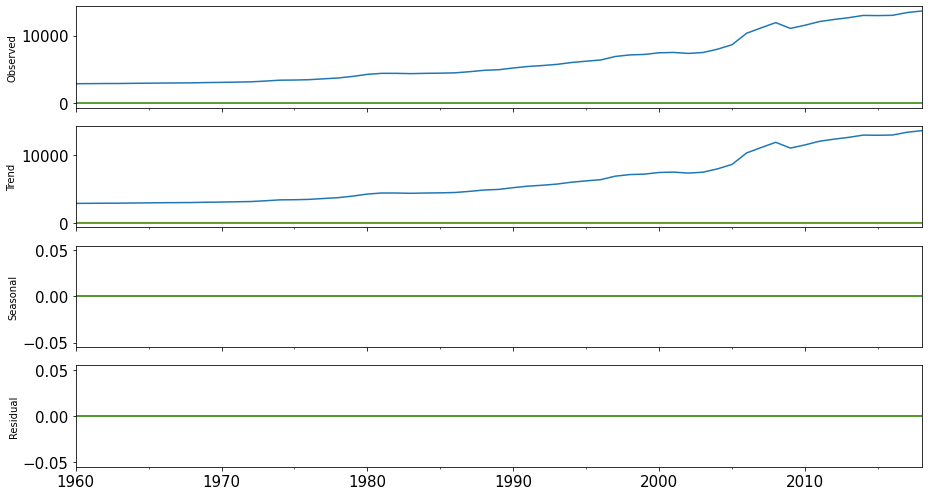

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7
SIZE2=15  
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels
decomposition = seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

Le nostre serie storiche si sono separate per tendenza, componenti stagionali e residui. 

Poiché le nostre serie storiche sono annuali, possiamo scartare qualsiasi tipo di stagionalità. Possiamo scartare anche qualsiasi modello sottostante nei residui.

# Stationarizzare le serie storiche
Dobbiamo trasformare i dati per renderli stazionari.

2.1 Differenza del primo ordine

Partiamo dal presupposto che possiamo rimuovere la tendenza / stagionalità dai nostri dati utilizzando la differenziazione del primo ordine. (prendiamo le prime differenze tra i valori nelle serie, l'ordine ci dice quanto distanti questi valori sono) Yt-Yt-1

In [0]:
# first order difference of the time series
y_diff = (y).diff().dropna()
y_diff = pd.Series(y_diff )

In [20]:
layout = go.Layout(title= 'Latin America & Caribbean GDP First order differencing',
xaxis = dict(ticks='', nticks=43),
yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))

trace0 = go.Scatter(x=y_diff.index, y=y_diff.values, mode = 'lines+markers',name="SSA GDPpc $ growth 1960-2018", marker = dict(size=12, color='black'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

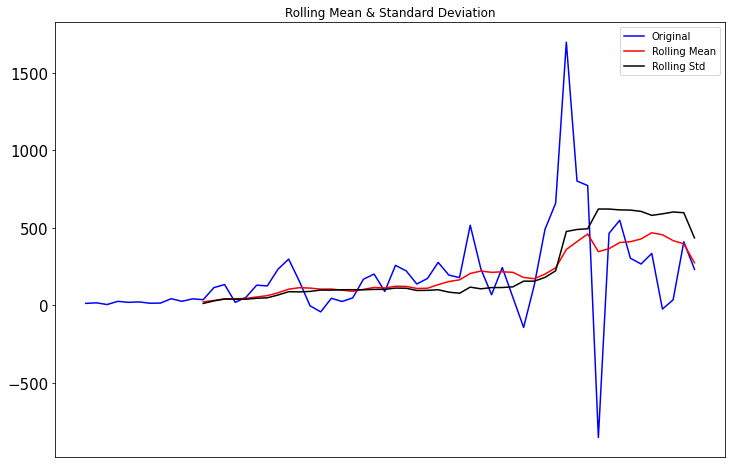

Results of Dickey-Fuller Test:
Test Statistic                 -5.222751
p-value                         0.000008
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [21]:
test_stationarity(y_diff)

2.2 Differenziazione del secondo ordine

Poiché i nostri dati differenziati non sono ancora fissi, è necessario includere un altro passaggio di differenziazione. Questo passaggio indica un'integrazione di ordine superiore del processo sottostante. Interpretiamo il secondo livello di dati differenziati come il "cambiamento di modifiche"

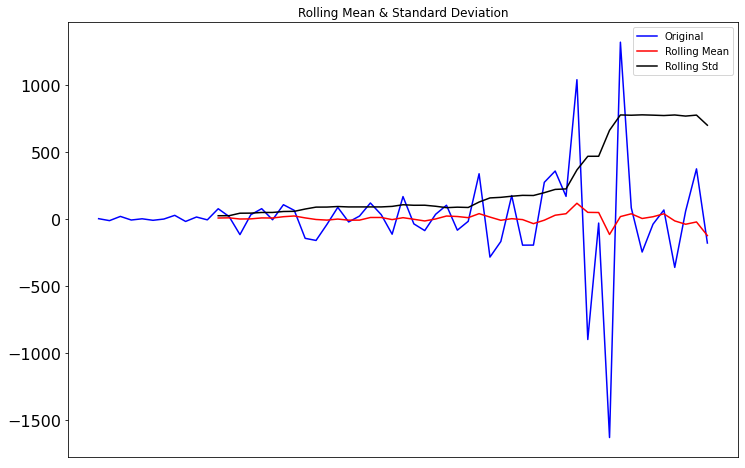

Results of Dickey-Fuller Test:
Test Statistic                 -4.503659
p-value                         0.000194
#Lags Used                     11.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [22]:
# log difference time series
y_diff2 = (y).diff().diff().dropna()
y_diff2 = pd.Series(y_diff2)
test_stationarity(y_diff2)

In [23]:
layout = go.Layout(title= 'Latin America & Caribbean GDP Second order differencing', xaxis = dict(ticks='', nticks=43),yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=y_diff2.index, y=y_diff2.values, mode = 'lines+markers',name="SSA GDPpc $ growth 1960-2018", marker = dict(size=12, color='black'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

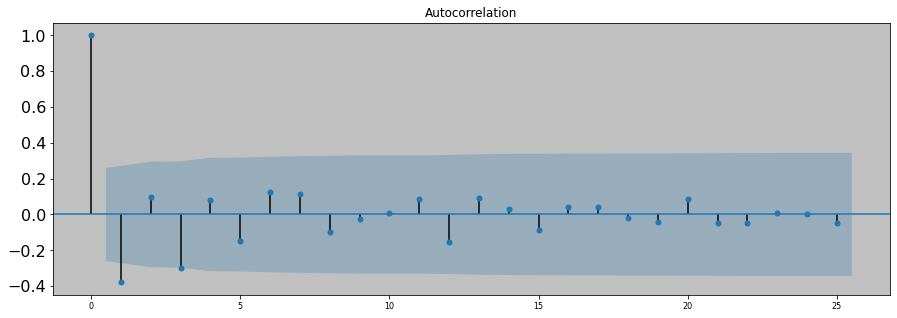

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
plt.rc('xtick', labelsize=16)
sm.graphics.tsa.plot_acf(y_diff2,ax=ax,lags=25)
plt.show()

Vediamo che la statistica del test di DF è già inferiore rispetto all'1% di significatività. Tuttavia, poiché vi sono picchi nel diagramma ACF che si trova al di fuori della zona insignificante, si può concludere che i residui non sono ancora casuali. Ciò implica che nei residui rimangono dei modelli di informazioni che possono essere estratti da modelli autoregressivi e mobili.

# 3) Modello ARIMA (p, d, q)

Per adattare i dati delle serie temporali a un modello ARIMA con i parametri ARIMA (p, d, q) dobbiamo trovare l'impostazione ottimale dei parametri che elimina le informazioni sistematiche e ci lascia con residui di rumore bianco gaussiano. Pertanto, per la selezione, il modello di adattamento migliore generiamo iterativamente diversi modelli con una data combinazione di parametri e adattiamo i dati ad esso. Per ciascuno di questi modelli calcoliamo l'Akaike Information Criterion (AIC) e infine scegliamo il modello per il quale i dati adattati risultano nell'AIC più basso. In questo caso, vogliamo scegliere un semplice modello ARIMA che generalizzi bene il comportamento della serie.

ORDINA p

Gli spettacoli PACF trasmettono la pura correlazione tra un ritardo e la serie. L'ordine 3 è il primo sopra la linea di significato. Scegliamo questo valore per mantenere il modello il più semplice possibile.

ORDINE d

Abbiamo già rilevato l'ordine di integrazione 2 per rendere stazionaria la serie.

ORDINA q

Usando il diagramma ACF possiamo misurare il numero di termini MA. Un termine MA è tecnicamente, l'errore della previsione ritardata. L'ordine 3 è il primo sopra la linea di significato; scegliamo questo valore per mantenere il modello il più semplice possibile.

Il criterio informativo di Akaike

Il criterio di informazione Akaike (AIC) è una misura della qualità relativa dei modelli statistici per un dato set di dati. Data una raccolta di modelli per i dati, AIC stima la qualità di ciascun modello, rispetto a ciascuno degli altri modelli. Quindi, AIC fornisce un mezzo per la selezione del modello. L'AIC misura il compromesso tra la bontà di adattamento del modello e la complessità del modello (numero di aprometri inclusi e stimati). L'AIC è calcolato come segue:

AIC = 2k - 2ln (L)

Dove k corrisponde al numero di parametri stimati nel modello e L si riferisce al valore massimo della funzione di probabilità per il modello. L'AIC misura solo l'adattamento del modello nel campione dei dati.

In [25]:
mod = sm.tsa.statespace.SARIMAX(ts['GDP per capita'].values,order=(3,2,3),enforce_stationarity=True,enforce_invertibility=True, maxiter=1000, method='css')
results1 = mod.fit()
print(results1.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(3, 2, 3)   Log Likelihood                -403.708
Date:                Sat, 21 Mar 2020   AIC                            821.416
Time:                        18:49:53   BIC                            835.718
Sample:                             0   HQIC                           826.974
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2823      0.664      0.425      0.671      -1.020       1.584
ar.L2          0.2329      1.010      0.231      0.818      -1.747       2.213
ar.L3         -0.3357      0.301     -1.116      0.2

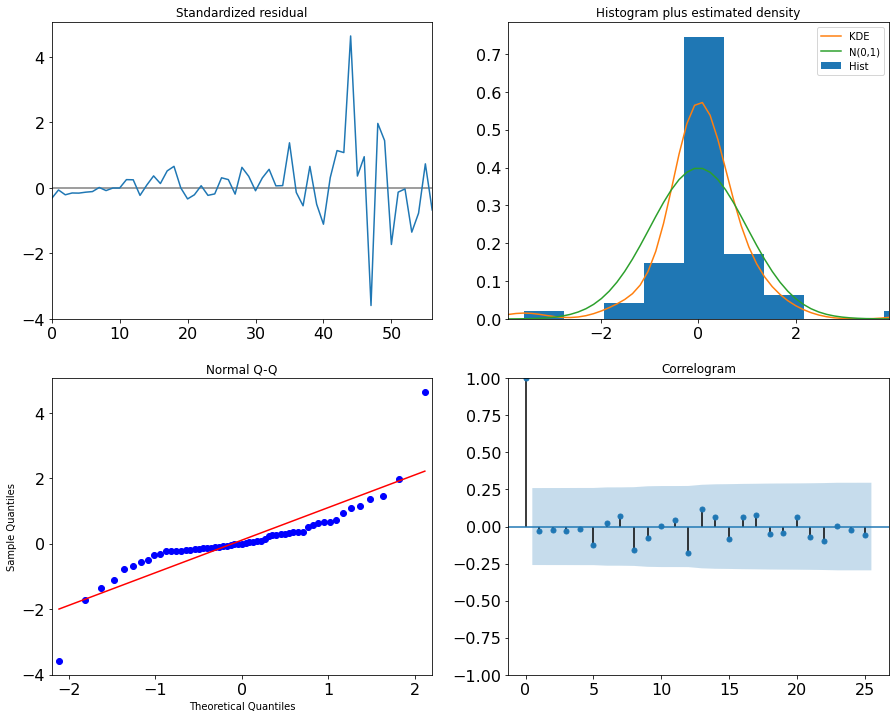

In [26]:
results1.plot_diagnostics(figsize=(15, 12),lags=25)
plt.show()

La trama residua standardizzata del modello montato nell'angolo in alto a destra sembra essere un rumore bianco in quanto non mostra alcun motivo. 

Il diagramma dell'istogramma nella coppia di angoli in alto a destra con la stima della densità del kernel (linea arancione) indica che le serie temporali sono quasi normalmente distribuite (linea verde) e approssimano il rumore bianco gaussiano.

Il correlogramma (grafico di autocorrelazione) conferma questo risultato, poiché i residui delle serie temporali mostrano basse correlazioni con i residui ritardati. Non ci sono picchi statisticamente significativi al livello di significatività del 5%. Quindi possiamo affermare che il correlogramma assomiglia a quello del rumore bianco discreto.

Possiamo concludere che il modello si adatta bene ai dati delle nostre serie temporali.

In [0]:
prediction_summary=results1.get_prediction(start=0, end=65).summary_frame()
prediction_summary.index=['1960-01-01','1961-01-01','1962-01-01','1963-01-01'
'1964-01-01','1965-01-01','1966-01-01','1967-01-01','1968-01-01','1969-01-01','1970-01-01','1971-01-01','1972-01-01','1973-01-01','1974-01-01','1975-01-01',
'1976-01-01','1977-01-01','1978-01-01','1979-01-01','1980-01-01','1981-01-01','1982-01-01','1983-01-01','1984-01-01','1985-01-01','1985-01-01','1986-01-01','1987-01-01','1988-01-01','1989-01-01',
'1990-01-01', '1991-01-01','1992-01-01','1993-01-01', '1994-01-01', '1995-01-01','1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01','2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
'2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01','2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01','2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
'2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01','2024-01-01', '2025-01-01']

In [0]:
forecast=results1.predict(start=0,end=65)
forecast=pd.DataFrame(forecast, columns = ['projection'])
forecast.index=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978',
'1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998','1999', 
'2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
'2017','2018','2019','2020','2021','2022','2023','2024','2025']

In [29]:
# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP PPP',marker = dict(size=7))
trace1 = go.Scatter(
    x = forecast.iloc[2:].index,
    y = forecast.iloc[2:].projection,
    mode = 'lines+markers',
    name = 'Arima model (5,2,0) in sample model & 2025 projection',marker = dict(size=7),opacity = 0.6)


layout = go.Layout(title= 'In-sample prediction and out-of-sample forecasting to 2025 per capita - GDP US$ Latin America & Caribbean',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0, trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [30]:
# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP PPP',marker = dict(size=7))


trace2 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_lower.values, name='ARIMA model 95% Lower CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace3 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_upper.values,name='ARIMA model 95% Upper CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace4 =go.Scatter(x=prediction_summary.iloc[28:].index, y=prediction_summary.iloc[28:]['mean'].values,name='ARIMA model mean projected values', mode = 'markers',
                   marker = dict(size=10, color='red'),opacity = 0.3)

layout = go.Layout(title= 'In-sample prediction and out-of-sample forecasting 95% CI - GDPpc US$ Latin America & Caribbean',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0,trace2,trace3,trace4]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Vediamo che le nostre prestazioni nel campione mostrano un allineamento molto forte e, a parte l'inizio della serie, il nostro errore relativo è compreso nell'intervallo dell'intervallo di confidenza al 95%, che è relativamente forte. Il nostro modello ARIMA (3,2,3) prevede che senza alcun cambiamento strutturale economico sottostante; con gli attuali modelli di crescita, il PIL pro capite in Latin America & Caribbean supererà la barriera di 15.000 dollari entro il 2025.

Dobbiamo tenere conto del fatto che i risultati di previsione di questo modello sono solo valori previsti, tenendo conto della struttura sottostante delle Serie storiche negli ultimi 28 anni.

# Times series comparison with the world average

In [0]:
df3=pd.read_csv('/content/drive/My Drive/WDIData.csv')
df3=df3[df3['Country Name']=='World']
df3['Indicator Name']=df3['Indicator Name'].str.replace('(',':').str.replace(')',':')
df3=df3[df3['Indicator Name'].str.contains("GDP per capita :current US")==True]
df3.index=df3['Country Name']
df3=df3.dropna(axis=1)
df3.drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
ts2=df3 ; ts2=ts2.T
ts2.index = pd.to_datetime(ts2.index)
ts2.columns=['GDP per capita']
ts2['world_percentatge']=ts['GDP per capita']/ts2['GDP per capita']

In [32]:
layout = go.Layout(title= 'World & Latin America/Caribbean GDP per capita constant US$ 1990-2018',
xaxis = dict(ticks='', nticks=43),
yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
trace0 =go.Scatter(x=ts2.index, y=ts2['GDP per capita'],
                   name='World GDP per capita TS 1990-2018', marker = dict(size=12, color='green'))
trace1 =go.Scatter(x=ts.index,y=ts['GDP per capita'],
                   name='Latin America & Caribbean GDP per capita TS 1990-2018',marker = dict(size=12, color='blue'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Sebbene entrambe le serie siano stazionarie, mentre il PIL pro capite mondiale mostra un modello di crescita molto più esponenziale, SSA segue un modello di crescita additiva più costante.

#  Growth distribution of both TS

In [0]:
SSA_growth=ts['GDP per capita'].pct_change().fillna(0)
World_growth=ts2['GDP per capita'].pct_change().fillna(0)

In [34]:
layout = go.Layout(title= 'Latin America & Caribbean vs World GDP per capita growth % 1960-2018',
    xaxis = dict(ticks='', nticks=43), yaxis = dict(nticks=20),legend=dict(x=0.1, y=1))

trace0 =go.Scatter(x=ts.index, y=SSA_growth*100, name='Latin America & Caribbean GDP per capita anual growth', mode = 'markers+lines',
                   marker = dict(size=12, color='blue'))

trace1 =go.Scatter(x=ts2.index, y=World_growth*100,name='World GDP per capita anual growth', mode = 'markers+lines',
                   marker = dict(size=12, color='green'))
data = [trace0, trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Si può individuare che il pil mondiale rispetto al pil dell'America Latina e delle isole caraibiche è leggeremente maggiore... (ALTRE CONSTATAZIONi)

Possiamo vedere come dal 1960 c'è stata una crescente divergenza tra il PIL pro capite Latin America & Caribbean e la media mondiale.

Mentre nel 1960 il PIL pro capite atin America & Caribbean era circa il 6.5% della media mondiale, nel 2018 rappresentava solo il 1% circa. In questi 58 anni Latin America & Caribbean ha diviso 6 punti e mezzo dalla media mondiale.

# Latin America & Caribbean total GDPpc PPP as a % of the World average 1990-2017

In [35]:
ts2['world_percentatge']=ts/ts2
layout = go.Layout(title= 'Latin America & Caribbean GDP per capita annual ratio with the world average 1960-2018',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
trace0 =go.Scatter(x=ts2.index, y=ts2['world_percentatge'],
                   mode = 'markers+lines',marker = dict(size=12, color='coral'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

# Diagnostic plots for standardized residuals

In [36]:
mod = sm.tsa.statespace.SARIMAX((ts2['GDP per capita']), order=(0,2,2),
                                enforce_stationarity=True, enforce_invertibility=True,)
results2 = mod.fit()
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:         GDP per capita   No. Observations:                   59
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -402.652
Date:                Sat, 21 Mar 2020   AIC                            811.305
Time:                        18:49:58   BIC                            817.434
Sample:                    01-01-1960   HQIC                           813.687
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5104      0.111     -4.619      0.000      -0.727      -0.294
ma.L2         -0.4215      0.076     -5.534      0.000      -0.571      -0.272
sigma2      7.771e+04   1.09e+04      7.113      0.0

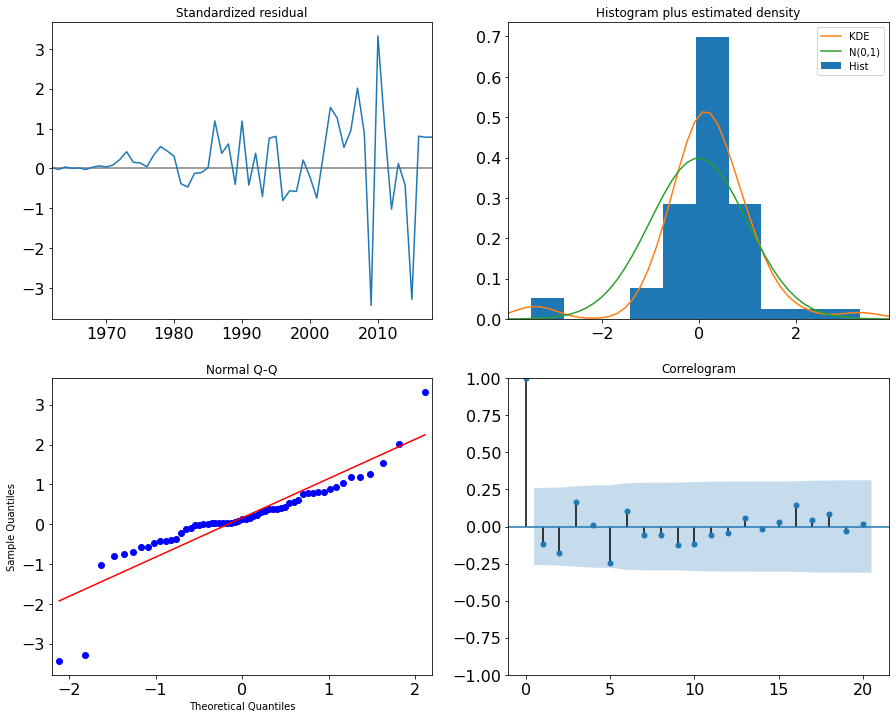

In [37]:
results2.plot_diagnostics(figsize=(15, 12),lags=20)
plt.show()

Il modello (0, 2, 2) ARIMA montato è adeguato poiché i residui standardizzati mostrano un modello di rumore gaussiano bianco e fluttuano attorno a 0.

Il 2009, (l'anno in cui la grande depressione ha colpito più duramente), rappresenta un enorme outlier, tuttavia, anche se non porta alcun comportamento informativo di base al modello, non possiamo omettere quest'anno per semplificare la procedura di modellazione (stazionaria e discreta residui di rumore bianco) perché con un campione così piccolo, l'accuratezza predittiva del modello sarebbe compromessa. Tuttavia non siamo stati in grado di estrarre informazioni su questo "componente insolito", il valore predittivo del modello rimane intatto.

Possiamo giungere alle stesse conclusioni delle serie storiche SSA e concludiamo che i residui seguono e approssimano la tendenza del rumore bianco gaussiano. A 20 ritardi il correlogramma non mostra alcun picco significativo superiore al livello di significatività del 5%. Quindi possiamo affermare che il correlogramma è un rumore bianco discreto.

#  In sample prediction and out of sample forecast

In [0]:
prediction_summary2=results2.get_prediction(start=0, end=65).summary_frame()
prediction_summary2.index=['1960-01-01','1961-01-01','1962-01-01','1963-01-01'
'1964-01-01','1965-01-01','1966-01-01','1967-01-01','1968-01-01','1969-01-01','1970-01-01','1971-01-01','1972-01-01','1973-01-01','1974-01-01','1975-01-01',
'1976-01-01','1977-01-01','1978-01-01','1979-01-01','1980-01-01','1981-01-01','1982-01-01','1983-01-01','1984-01-01','1985-01-01','1985-01-01','1986-01-01','1987-01-01','1988-01-01','1989-01-01',
'1990-01-01', '1991-01-01','1992-01-01','1993-01-01', '1994-01-01', '1995-01-01','1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01','2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
'2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01','2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01','2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
'2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01','2024-01-01', '2025-01-01']

In [39]:
forecast2=results2.predict(start=2,end=70)

forecast1=results1.predict(start=0,end=70)

# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Latin America & Caribbean Actual GDP PPP',marker = dict(size=7))

trace1 = go.Scatter(
    x = forecast.iloc[2:].index,
    y = forecast.iloc[2:].projection,
    mode = 'lines',
    name = 'Latin America & Caribbean Arima model (5,2,0) prediction',marker = dict(size=7),opacity = 0.5)

# Create traces
trace2 = go.Scatter(
    x = ts2.index,
    y = ts2['GDP per capita'],
    mode = 'markers',
    name = 'World Actual GDP PPP',marker = dict(size=7))


trace3 = go.Scatter(
    x = forecast2.index,
    y = forecast2.values,
    mode = 'lines',
    name = 'World Arima model (0,2,1) prediction',marker = dict(size=7),opacity = 0.5)


layout = go.Layout(title= 'In-sample prediction and out-of-sample projection to 2025 (GDPpc PPP US$) Latin America/Caribbean & WA',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))

data = [trace0, trace1,trace2,trace3]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [40]:
forecast
# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP PPP',marker = dict(size=7))


trace2 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_lower.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace3 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_upper.values, name='95% CI', mode = 'lines',
   marker = dict(size=10, color='red'),opacity = 0.3)

# Create traces
trace4 = go.Scatter(
    x = ts2.index,
    y = ts2['GDP per capita'],
    mode = 'markers',
    name = 'World Actual GDP PPP',marker = dict(size=7,color='green'))

trace5 =go.Scatter(x=prediction_summary2.iloc[2:].index, y=prediction_summary2.iloc[2:].mean_ci_lower.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace6 =go.Scatter(x=prediction_summary2.iloc[2:].index, y=prediction_summary2.iloc[2:].mean_ci_upper.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)


layout = go.Layout(title= 'In-sample prediction and out-of-sample projection to 2025 95% CI (GDPpc PPP US$) Latin America/Caribbean & WA',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0,trace2,trace3,trace4,trace5,trace6]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Conclusioni

Tenendo conto dei modelli sottostanti di entrambe le serie storiche, senza un cambiamento strutturale nelle serie storiche regionali del PIL, America Latina e Caraibi continueranno a essere il perdente dell'economia globale per il prossimo decennio e la divergenza con la media mondiale è destinata ad aumentare. Il nostro modello indica che se le attuali tendenze sottostanti continuano, il PIL regionale come percentuale della media mondiale starà tra i 10 e 14k circa alla fine degli anni '20 dal valore attuale di circa il 11%.

L'attuale tendenza strutturale della crescita del PIL della regione rimane debole. Un modello di crescita molto più esplosivo è altamente necessario per convergere con la media mondiale. Il ritorno ai livelli pre-crisi di circa il 5% di crescita porterebbe la regione nel percorso medio mondiale di convergenza.

Nota: dobbiamo ricordare che i risultati di previsione di questi modelli sono solo valori previsti. L'economia è un sistema complesso e dinamico. Gli aggiustamenti della macro e politica di investimento, l'integrità e l'ambiente istituzionali, la stabilità sociale, oltre ad altri numerosi fattori interni ed esterni interni possono causare drastici cambiamenti in termini di crescita del PIL pro capite in qualsiasi regione del mondo.